# 3.ディクショナリ


ここでは、ディクショナリについて説明していきます。そして本課題を実装する過程でディクショナリを使います。

ディクショナリとは
ディクショナリの説明をする前に配列について述べます。まず例として以下の配列を考えましょう。


In [17]:
test = ["800万", "4人", "40才", "男"]

配列は、list型と呼ばれるミュータブル（値の変更が可能）なデータ型です。上のtest配列の各要素には[“年収”, “家族人数”, “年齢”, “性別”]という別々な情報が格納されているとします。

もしこのtest配列からデータを取り出したい場合、test配列には、[“年収”, “家族人数”, “年齢”, “性別”]という情報が保持されていないので、どの要素に何の情報が格納されているか　を覚えておかなくてはなりません。今の例のように要素が少ない場合には問題ないですが、要素数が増えた場合に各要素が何の情報を意味するのか認識しておくのは困難になります。

なので、あらかじめ 各要素が何を意味しているのかという情報も要素と一緒に保存しておこう というのがディクショナリのモチベーションです。すなわち各要素に対して、そのラベルもセットで保存するイメージです。

## ディクショナリのkeyとvalue
それではディクショナリの使い方について述べていきます。

test配列を、各要素の情報（[“年収”, “家族人数”, “年齢”, “性別”]）と一緒にディクショナリとして格納すると以下のようになります。ディクショナリを定義する際は{}を用いることに注意してください。


In [18]:
test = {"年収":"800万", "家族人数":"4人", "年齢":"40才", "性別":"男"}

ディクショナリの要素の「:」の左側をkey、右側をkeyに対するvalue（値）と言います。今の例では、[“年収”, “家族人数”, “年齢”, “性別”]はtestディクショナリのkeyであり、[“800万”, “4人”, “40才”, “男”]が各keyに対するvalue（値）になります。

こうすれば、valueが意味する情報も紐づいているので、valueの紐づいている情報を覚えておく必要もないわけです。今の例では、valueが全て文字列になっていますが、当然int型やfloat型もディクショナリのvalueになりえます。

## ディクショナリのメソッド
ここではディクショナリのメソッドについて紹介していきます。本課題を解くのに必要なメソッドもあるので、どんな操作なのか理解しておきましょう。

以下のディクショナリを例にみていきます。サッカーW杯の優勝回数上位6ヶ国（key）とその優勝回数(value)を格納したものです。

In [19]:
hist_worldcup = {"ブラジル":5, "ドイツ":4, "イタリア":4, "アルゼンチン":2, "フランス":2, "イングランド":1}

《keyを取り出す》

keys()を用いることで、全てのkeyを一括で取り出すことができます.

In [20]:
hist_worldcup.keys()

dict_keys(['ブラジル', 'ドイツ', 'イタリア', 'アルゼンチン', 'フランス', 'イングランド'])

《valueを取り出す》

values()を用いることでvalueを一括で取り出すことができます。

In [21]:
hist_worldcup.values()

dict_values([5, 4, 4, 2, 2, 1])

《任意のkeyに対するvalueを取り出す》

get()を用いることで、()の中で指定したkeyに対するvalueを取り出すことができます。

In [22]:
hist_worldcup.get("ブラジル")

5

《keyとvalueを取り出す》

items()を用いるとディクショナリに登録されているkeyとvalueが要素であるタプルのリストを返してくれます。

In [23]:
hist_worldcup.items()

dict_items([('ブラジル', 5), ('ドイツ', 4), ('イタリア', 4), ('アルゼンチン', 2), ('フランス', 2), ('イングランド', 1)])

dict_itemsオブジェクト型の中にリスト型オブジェクト、さらにそのリスト型オブジェクトの中にタプルが格納されています。一つずつ取り出したい場合は、以下のようにfor文などと組み合わせます。

In [24]:
for key, value in hist_worldcup.items():
    print(key, value)

ブラジル 5
ドイツ 4
イタリア 4
アルゼンチン 2
フランス 2
イングランド 1


ディクショナリの基本的なメソッドは以上です。他にも機械学習を扱う中で利用する機能はありますが、これらを知っているだけで様々な操作が可能です。この後の問題で実際に使い確認していきましょう。

# 4.ダーツ投げのシミュレーションの作成


実装する上での前提条件を以下に示します。

複数のダーツのまとは、間を空けずに横一列に並んでいるとします。
ある番号のまとに狙ったダーツは、他のまとには行かないとします。

実装するフローは以下になります。

ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）
サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）
ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）
1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）
各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）

これらのフローを以下の問題を通じて一つ一つ実装していきましょう。


## 【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。

《ヒント》

「サイコロを振る」動作を表現するのにnp.random.choice()を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [25]:
import numpy as np

dice = [1,2,3,4,5,6]
dice_ndarray = np.random.choice(dice)
print("サイコロの目は{}です。".format(dice_ndarray))

サイコロの目は4です。


## 【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。

《ヒント》

ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、x座標とy座標用に、別々にnp.random.normal()から変数を発生させ、それらの組みを座標点として、配列で保持してください。

また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。その場合、例えば平均値ベクトルを[0,0] (mean=[0,0])、共分散行列を[[[0.01,0],[0,0.01]] (cov=[[0.01,0],[0,0.01]])としてnp.random.multivariate_normal(mean, cov)とすると、x座標とy座標の変数の組みを作れます。

In [26]:
x_ndarray = np.random.normal(dice_ndarray, 0.1)
y_ndarray = np.random.normal(0, 0.1)
print([x_ndarray,y_ndarray])
mean = [dice_ndarray,0]
cov = [0.1, 0],[0, 0.1]
x,y = np.random.multivariate_normal(mean, cov).T
print([x,y])

[3.997680736410771, 0.09421154944138029]
[3.7845577164354554, 0.021407071801521804]


【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

《ヒント》

「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。 問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。


In [27]:
x_dict = {}
y_dict = {}
for count in range(1000):
    dice = [1,2,3,4,5,6]
    dice_ndarray = np.random.choice(dice) #1
    
    mean = [dice_ndarray,0]
    cov = [0.01, 0],[0, 0.01]
    x,y = np.random.multivariate_normal(mean, cov).T#2
    
    x_dict.setdefault(dice_ndarray,[]).append(x)
    y_dict.setdefault(dice_ndarray,[]).append(y)
print(x_dict.keys(),y_dict.keys())
    

dict_keys([2, 4, 6, 5, 1, 3]) dict_keys([2, 4, 6, 5, 1, 3])


【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

matplotlibのpatchesクラスの公式ドキュメント

matplotlib.patches.Circle — Matplotlib 3.1.1 documentation

Mmh Donuts!!! — Matplotlib 3.1.1 documentation

ここまで出来ていれば、最初に示したような図が描画されるはずです。


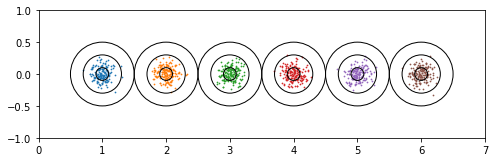

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
%matplotlib inline

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
fig_list = []

for mato in dice:
    
    
    mato_x = np.array(x_dict.get(mato)).reshape(len(x_dict.get(mato)),1)
    mato_y = np.array(y_dict.get(mato)).reshape(len(y_dict.get(mato)),1)

    fig_list.append(ax.scatter(mato_x, mato_y, s= 0.5))
    
    #out = mpatches.Circle(xy=(int(mato), 0), radius=0.5, fill=False)
    #mid = mpatches.Circle(xy=(int(mato), 0), radius=0.3, fill=False)
    #bull = mpatches.Circle(xy=(int(mato), 0), radius=0.1, fill=False)

    
    ax.add_patch(mpatches.Circle((mato, 0), radius=0.5, fill=False))
    ax.add_patch(mpatches.Circle((mato, 0), radius=0.3, fill=False))
    ax.add_patch(mpatches.Circle((mato, 0), radius=0.1, fill=False))
    

    
    
    #ax.add_patch(out) 
    #ax.add_patch(mid)
    #ax.add_patch(bull)

ax.set_aspect(1)

ax.set_xlim([0, 7])
ax.set_ylim([-1, 1])
plt.show()

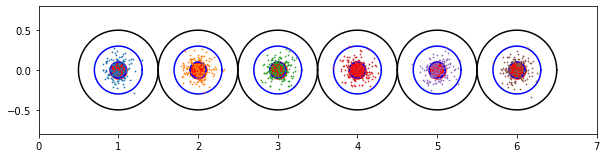

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

def target(a):
    theta = np.linspace(0, 2*np.pi, 100)

    radius = a

    a = radius*np.cos(theta)
    b = radius*np.sin(theta)
    return a,b



fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)



for mato in dice:
    
    
    a,b = target(0.5)
    a2,b2 = target(0.3)
    a3,b3 = target(0.1)
    ax.plot(a + mato, b, c='#000000', zorder=1)
    ax.plot(a2 + mato, b2, c='b', zorder=1)
    ax.plot(a3 + mato, b3, c='b', zorder=1)
    
    mato_x = np.array(x_dict.get(mato)).reshape(len(x_dict.get(mato)),1)
    mato_y = np.array(y_dict.get(mato)).reshape(len(y_dict.get(mato)),1)

    ax.scatter(mato_x, mato_y, s= 0.5, zorder=2)
    ax.scatter(0+mato, 0, s=300, c='red')
    
    #out = mpatches.Circle(xy=(int(mato), 0), radius=0.5, fill=False)
    #mid = mpatches.Circle(xy=(int(mato), 0), radius=0.3, fill=False)
    #bull = mpatches.Circle(xy=(int(mato), 0), radius=0.1, fill=False)

    
    #ax.add_patch(mpatches.Circle((mato, 0), radius=0.5, fill=False))
    #ax.add_patch(mpatches.Circle((mato, 0), radius=0.3, fill=False))
    #ax.add_patch(mpatches.Circle((mato, 0), radius=0.1, fill=False))
    

    
    #ax.add_patch(out) 
    #ax.add_patch(mid)
    #ax.add_patch(bull)

    

ax.set_aspect(1)

ax.set_xlim([0, 7])
ax.set_ylim([-0.8, 0.8])
plt.show()

[3.         2.99995    2.99980001 ... 2.49986562 2.49995654 2.49999746]
[4.99999493 4.99991308 4.99973123 ... 4.49986562 4.49995654 4.49999746]
[7.         6.99995    6.99980001 ... 6.4999     6.499975   6.5       ]
[8.99999493 8.99991308 8.99973123 ... 8.4999     8.499975   8.5       ]
[11.         10.99995    10.99980001 ... 10.49986562 10.49995654
 10.49999746]


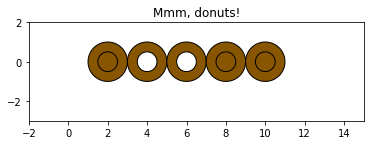

In [32]:
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


def wise(v):
    if v == 1:
        return "CCW"
    else:
        return "CW"


def make_circle(r):
    t = np.arange(0, np.pi * 2.0, 0.01)
    t = t.reshape((len(t), 1))
    x = r * np.cos(t)
    y = r * np.sin(t)
    return np.hstack((x, y))

Path = mpath.Path

fig, ax = plt.subplots()

inside_vertices = make_circle(0.5)
outside_vertices = make_circle(1.0)
codes = np.ones(
    len(inside_vertices), dtype=mpath.Path.code_type) * mpath.Path.LINETO
codes[0] = mpath.Path.MOVETO

for i, (inside, outside) in enumerate(((1, 1), (1, -1), (-1, 1), (-1, -1), (1,1))):
    # Concatenate the inside and outside subpaths together, changing their
    # order as needed
    vertices = np.concatenate((outside_vertices[::outside],
                               inside_vertices[::inside]))
    # Shift the path
    vertices[:, 0] += (i+1) * 2
    print(vertices[:, 0])
    # The codes will be all "LINETO" commands, except for "MOVETO"s at the
    # beginning of each subpath
    all_codes = np.concatenate((codes, codes))
    # Create the Path object
    path = mpath.Path(vertices, all_codes)
    # Add plot it
    patch = mpatches.PathPatch(path, facecolor='#885500', edgecolor='black')
    ax.add_patch(patch)

    #ax.annotate("Outside %s,\nInside %s" % (wise(outside), wise(inside)),
                #(i * 2.5, -1.5), va="top", ha="center")

ax.set_xlim(-2, 15)
ax.set_ylim(-3, 2)
ax.set_title('Mmm, donuts!')
ax.set_aspect(1.0)
plt.show()

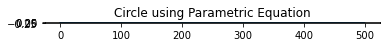

In [34]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 500)

radius = 0.3

a = radius*np.cos(theta)
b = radius*np.sin(theta)

figure, axes = plt.subplots(1)

axes.plot(a+ b)
axes.set_aspect(1)

plt.title('Circle using Parametric Equation')
plt.show()

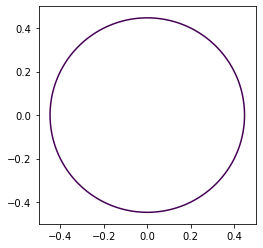

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)

a, b = np.meshgrid(x,y)

C = a**2+b**2-0.2

figure, axes = plt.subplots()

axes.contour(a,b,C,[0])
axes.set_aspect(1)

plt.show()

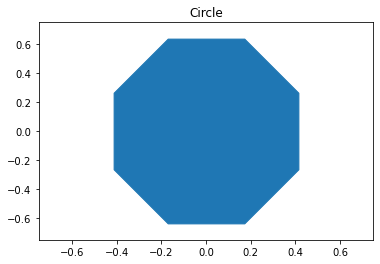

In [36]:
import matplotlib.pyplot as plt

plt.scatter(0, 0, s=40000, marker="8")
plt.title('Circle')

plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)

plt.show()

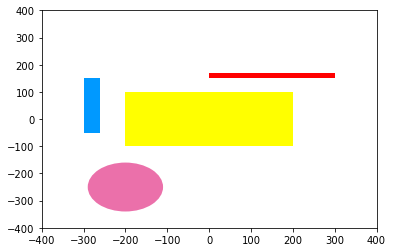

In [37]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.collections import PatchCollection
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
patches_list = []
color_list = []
patches_list.append(matplotlib.patches.Rectangle((-200,-100), 400, 200))
color_list.append('yellow')
patches_list.append(matplotlib.patches.Rectangle((0,150), 300, 20))
color_list.append('red')
patches_list.append(matplotlib.patches.Rectangle((-300,-50), 40, 200))
color_list.append('#0099FF')
patches_list.append(matplotlib.patches.Circle((-200,-250), radius=90))
color_list.append('#EB70AA')

our_cmap = ListedColormap(color_list)
patches_collection = PatchCollection(patches_list, cmap=our_cmap)
patches_collection.set_array(np.arange(len(patches_list)))
ax.add_collection(patches_collection)

plt.xlim([-400, 400])
plt.ylim([-400, 400])
plt.show()

NameError: name 'AnchoredDrawingArea' is not defined

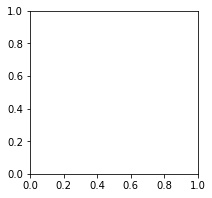

In [38]:
from matplotlib.patches import Circle
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(3, 3))

ada = AnchoredDrawingArea(40, 20, 0, 0,
                          loc='upper right', pad=0., frameon=False)
p1 = Circle((10, 10), 10)
ada.drawing_area.add_artist(p1)
p2 = Circle((30, 10), 5, fc="r")
ada.drawing_area.add_artist(p2)

ax.add_artist(ada)

plt.show()

## 【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。

《ヒント》

ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。

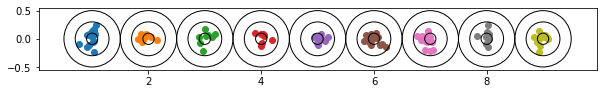

In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

def darts(dat_count,tage):
    x_dict = {}
    y_dict = {}
    for count in range(dat_count):
        #dice = [1,2,3,4,5,6]
        dice = np.arange(1,tage + 1)
        dice_ndarray = np.random.choice(dice) #1

        mean = [dice_ndarray,0]
        cov = [0.01, 0],[0, 0.01]
        x,y = np.random.multivariate_normal(mean, cov).T#2

        x_dict.setdefault(dice_ndarray,[]).append(x)
        y_dict.setdefault(dice_ndarray,[]).append(y)
    #print(x_dict.keys(),y_dict.keys())

    #fig, ax = plt.subplots(figsize=(20,10))
    fig, ax = plt.subplots(figsize=(10, 5))
    
    for mato in dice:

        mato_x = np.array(x_dict.get(mato)).reshape(len(x_dict.get(mato)),1)
        mato_y = np.array(y_dict.get(mato)).reshape(len(y_dict.get(mato)),1)

        ax.scatter(mato_x, mato_y)

        out = mpatches.Circle((mato, 0), radius=0.5, fill=False)
        mid = mpatches.Circle((mato, 0), radius=0.3, fill=False)
        bull = mpatches.Circle((mato, 0), radius=0.1, fill=False)

        ax.add_patch(out)
        ax.add_patch(mid)
        ax.add_patch(bull)

    ax.set_aspect(1)
    plt.show()
    
darts(100,9)
    

## 【発展】ダーツシミュレーションの数理的な話
今回実装する中でいくつか確率分布を使用した部分があったと思います。具体的には以下です。

どのまとを選択するかを一様分布のサイコロを振ることで表現
ダーツが刺さる場所を正規分布と仮定することで表現

言い換えると、この2つの事象を　確率的に生じる　と仮定して、シミュレーションをしたわけです。このように、ある入力に対して出力が確率的に生成されるという仮説のもとモデルを構築することを　確率的生成モデル　と言います。

ここでいうモデルとは機械学習モデルのことではなく、一般的な数理的なシミューション全般をさします。

出る目の分布が一様分布に従うサイコロは以下のように表せます。

p(d=1)=16,⋯,p(d=6)=16

ダーツが刺さる場所は、x座標もy座標も正規分布に従うと仮定すると以下のように表せます。

p(x|d)=p(x|μ(d))=N(x|μ(d),σ2)
そして、サイコロを振る→正規分布からx座標とy座標のデータをサンプリングする　という連続的な2つの事象は上記の2つの確率分布の積で表現できるのでダーツが刺さる場所は以下のような確率密度分布で表現できます。

p(x)=∑6d=1p(d)p(x|d)=∑6d=116N(x|μ(d),σ2)

このようないくつかの正規分布の重みつき平均で得られる確率分布を　混合正規分布　と言います。

ここでは、確率的生成モデルの入り口に立ってもらうために確率分布を用いたプログラミングに取り組んでいただきました。アニメのキャラクター生成など、メディアでよく取り上げられているものもGANやVAEなどの生成モデルを使っています。今はそれらについて勉強する必要はありませんが、事象が確率的に生じると仮定して、ある入力に対して出力が確率的に生成されるという仮説のもと構築されるモデル ということは覚えておくと良いでしょう。